In [103]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [104]:
## importing necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Dataset Loading

In [105]:

df = pd.read_csv("sms_spam_balanced_augmented.csv")



In [106]:
df.head()

,label,message
0,ham,How much would it cost to hire a gunman
1,spam,You have been chosen to receive a £2000 shoppi...
2,spam,You've been selected! iPhone 15 Pro Max is you...
3,ham,Hey! There's vegetable pizza... :/
4,ham,Also maaaan are you missing out


In [107]:
df.shape

(65790, 2)

## 1.1 Basic Statistical Summary

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65790 entries, 0 to 65789
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    65790 non-null  object
 1   message  65790 non-null  object
dtypes: object(2)
memory usage: 1.0+ MB


In [109]:
df['label'].value_counts()

label
ham     32895
spam    32895
Name: count, dtype: int64

In [110]:
# Checking percentage distribution of labels

df['label'].value_counts(normalize=True)

label
ham     0.5
spam    0.5
Name: proportion, dtype: float64

In [111]:
print("Missing values:\n", df.isnull().sum())



Missing values:
 label      0
message    0
dtype: int64


In [112]:
# Count of each sentiment class
sentiment_counts = df['label'].value_counts()

# Displaying counts
sentiment_counts

label
ham     32895
spam    32895
Name: count, dtype: int64

## Feature - Target Seperation

In [113]:
# Input features (SMS text) and Target labels (spam / ham) 

X = df['message']   
y = df['label']     


## 1.2 Class balance check

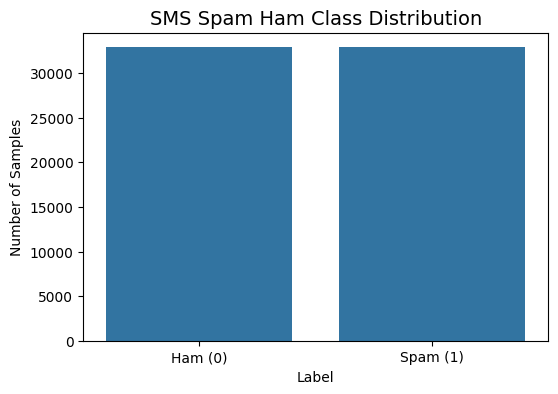

In [114]:
# Plotting class distribution

plt.figure(figsize=(6,4))
sns.barplot(
    x=sentiment_counts.index,
    y=sentiment_counts.values
)
plt.title("SMS Spam Ham Class Distribution", fontsize=14)
plt.xlabel("Label")
plt.ylabel("Number of Samples")
plt.xticks([0,1], ['Ham (0)', 'Spam (1)'])
plt.show()

In [115]:
def check_dataset_balance(labels, threshold=0.20):
    
    class_dist = labels.value_counts(normalize=True)
    imbalance_ratio = class_dist.max() - class_dist.min()
    
    print("Class Distribution (Percentage):")
    print((class_dist * 100).round(2))
    print("\nImbalance Ratio:", round(imbalance_ratio * 100, 2), "%")
    
    # Balancing decision
    
    if imbalance_ratio <= threshold:
        print("\n Dataset is BALANCED.")
    else:
        print("\n Dataset is IMBALANCED.")

check_dataset_balance(df['label'])

Class Distribution (Percentage):
label
ham     50.0
spam    50.0
Name: proportion, dtype: float64

Imbalance Ratio: 0.0 %

 Dataset is BALANCED.


# Section 2: Data Cleaning and Text Preprocessing

In [116]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Downloading required NLTK resources 

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pragyarayamajhi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pragyarayamajhi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/pragyarayamajhi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [117]:
# Initializing lemmatizer and stopwords

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    
    # Converting to lowercase
    text = text.lower()
    
    # Removing URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Removing numbers and special characters
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenization
    tokens = text.split()
    
    # Removing stopwords and apply lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    
    # Joining tokens back into a string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

## 2.1 applying preprocessing to dataset

In [118]:
# Applying text cleaning to the Text column

df['cleaned_text'] = df['message'].apply(clean_text)

# Displaying sample comparison

df[['message', 'cleaned_text']].head()

,message,cleaned_text
0,How much would it cost to hire a gunman,much would cost hire gunman
1,You have been chosen to receive a £2000 shoppi...,chosen receive shopping spree call code bvfx
2,You've been selected! iPhone 15 Pro Max is you...,youve selected iphone pro max call ref vtn
3,Hey! There's vegetable pizza... :/,hey there vegetable pizza
4,Also maaaan are you missing out,also maaaan missing


## 2.2 Text Length Analysis (Before & After Cleaning)

In [119]:
# Text length before cleaning
df['text_length_raw'] = df['message'].apply(lambda x: len(x.split()))

# Text length after cleaning
df['text_length_cleaned'] = df['cleaned_text'].apply(lambda x: len(x.split()))

# Displaying summary statistics
df[['text_length_raw', 'text_length_cleaned']].describe()

,text_length_raw,text_length_cleaned
count,65790.000000,65790.000000
mean,13.306354,8.202143
std,8.111988,4.635828
min,1.000000,0.000000
25%,9.000000,6.000000
50%,12.000000,8.000000
75%,14.000000,9.000000
max,172.000000,89.000000


## 2.3 Text Length Analysis – Seaborn & Matplotlib Visualizations

### 2.3.1 Histogram Comparison (Before vs After Cleaning) – Seaborn

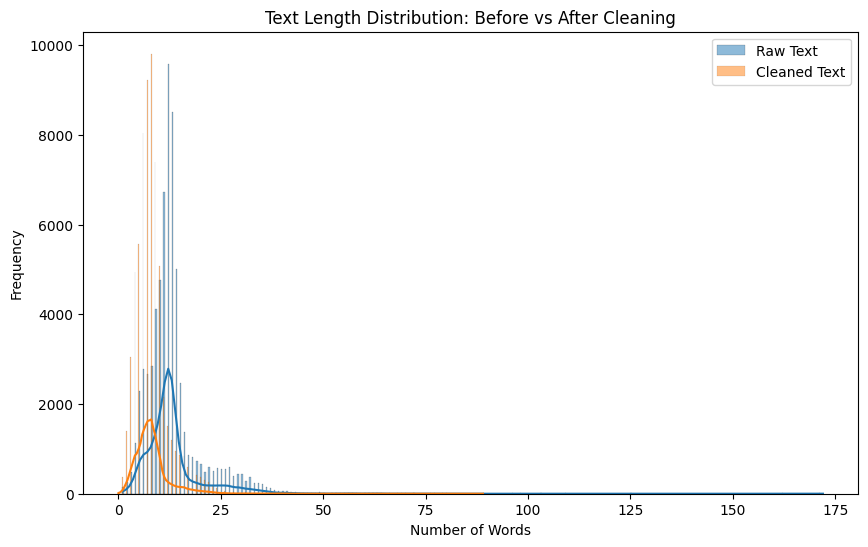

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['text_length_raw'], label='Raw Text', kde=True)
sns.histplot(df['text_length_cleaned'], label='Cleaned Text', kde=True)
plt.legend()
plt.title("Text Length Distribution: Before vs After Cleaning")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

### 2.3.2 Boxplot Comparison – Seaborn

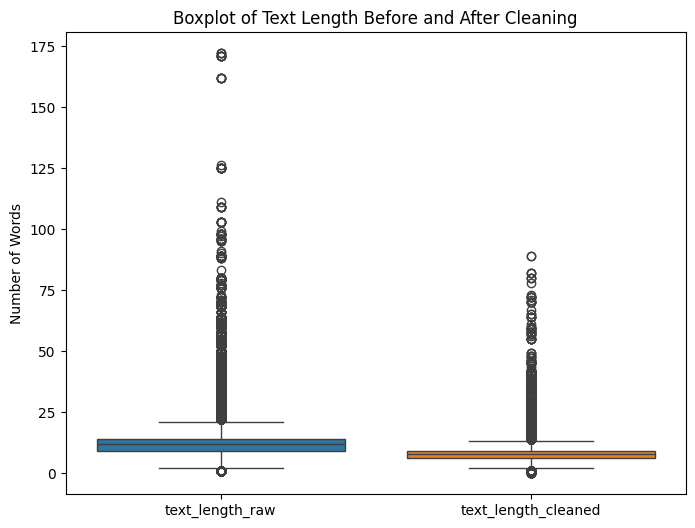

In [121]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df[['text_length_raw', 'text_length_cleaned']])
plt.title("Boxplot of Text Length Before and After Cleaning")
plt.ylabel("Number of Words")
plt.show()

### 2.3.3 Violin Plot (Distribution Shape) – Seaborn

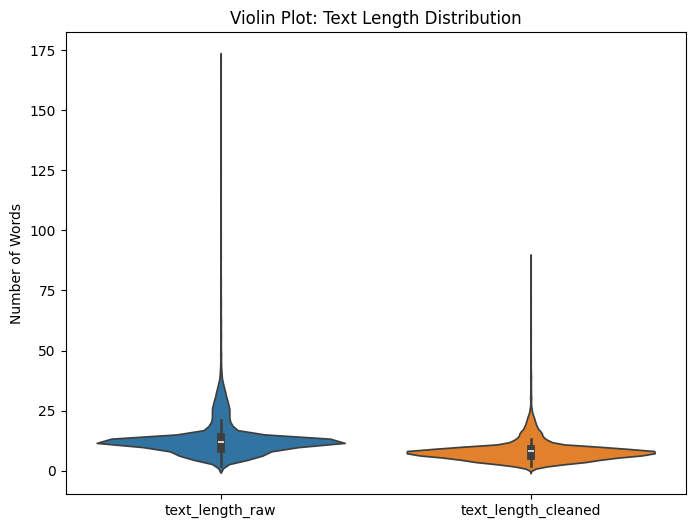

In [122]:
plt.figure(figsize=(8,6))
sns.violinplot(data=df[['text_length_raw', 'text_length_cleaned']])
plt.title("Violin Plot: Text Length Distribution")
plt.ylabel("Number of Words")
plt.show()

### 2.3.4 Mean Text Length Comparison – Matplotlib

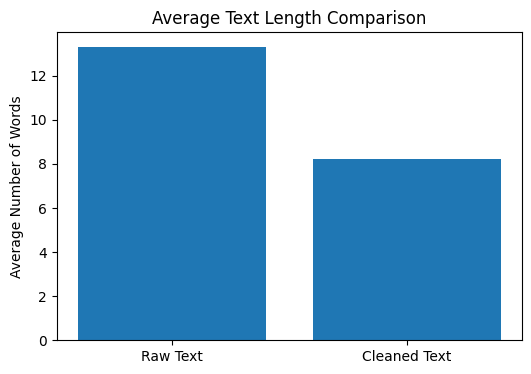

In [123]:
mean_raw = df['text_length_raw'].mean()
mean_cleaned = df['text_length_cleaned'].mean()

plt.figure(figsize=(6,4))
plt.bar(['Raw Text', 'Cleaned Text'], [mean_raw, mean_cleaned])
plt.title("Average Text Length Comparison")
plt.ylabel("Average Number of Words")
plt.show()

### 2.3.5 Label-wise Text Length

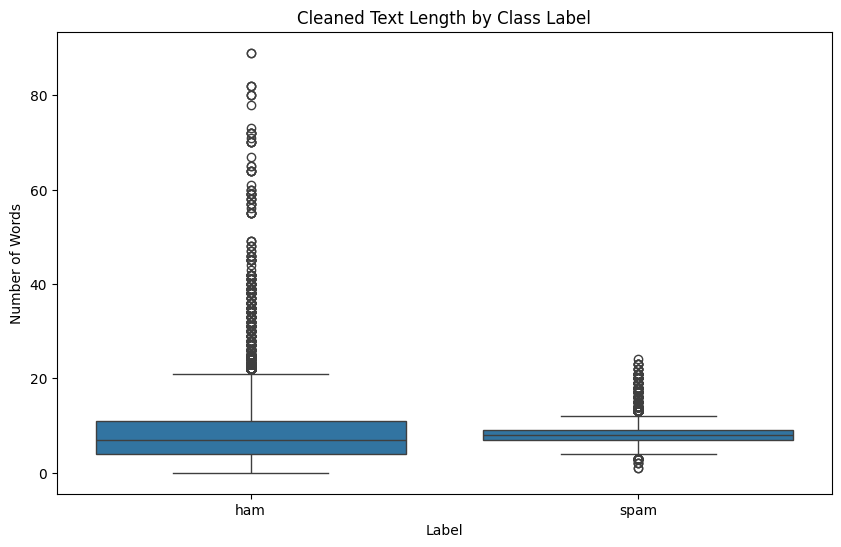

In [124]:
plt.figure(figsize=(10,6))
sns.boxplot(x='label', y='text_length_cleaned', data=df)
plt.title("Cleaned Text Length by Class Label")
plt.xlabel("Label")
plt.ylabel("Number of Words")
plt.show()

# Section 3: Feature Engineering and model training

## 3.1 Feature and Target Separation

In [125]:
# Feature (independent variable)
X = df['cleaned_text']

# Target (dependent variable)
y = df['label']

# Verify shapes
print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (65790,)
Target shape: (65790,)


In [126]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode target labels
y_encoded = label_encoder.fit_transform(y)

# Mapping check
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
label_mapping

{'ham': np.int64(0), 'spam': np.int64(1)}

In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2)
)

# Fit and transform text data
X_tfidf = tfidf.fit_transform(X)

# Check TF-IDF matrix shape
X_tfidf.shape

(65790, 5000)

## 3.2 Train–Test Split

In [128]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,
    y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

# Verify split sizes
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (52632, 5000)
Testing set size: (13158, 5000)


## 3.3 Train Models on Training Data

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score


In [130]:
# Initializing models

log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42
)

naive_bayes = MultinomialNB()

In [131]:
# Train Logistic Regression
log_reg.fit(X_train, y_train)

# Train Naive Bayes
naive_bayes.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [132]:
# Predictions
y_pred_lr = log_reg.predict(X_test)
y_pred_nb = naive_bayes.predict(X_test)

In [133]:
from sklearn.metrics import classification_report

print("Baseline Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_lr))



Baseline Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6579
           1       1.00      0.99      1.00      6579

    accuracy                           1.00     13158
   macro avg       1.00      1.00      1.00     13158
weighted avg       1.00      1.00      1.00     13158



In [134]:
print("Baseline Naive Bayes Classification Report:\n")
print(classification_report(y_test, y_pred_nb))

Baseline Naive Bayes Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6579
           1       1.00      0.99      0.99      6579

    accuracy                           0.99     13158
   macro avg       0.99      0.99      0.99     13158
weighted avg       0.99      0.99      0.99     13158



# 4 Model Evaluation

## 4.1 Confusion Matrix Visualization

In [135]:
from sklearn.metrics import confusion_matrix

# Computing confusion matrices
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_nb = confusion_matrix(y_test, y_pred_nb)

## Logistic Regression Confusion Matrix

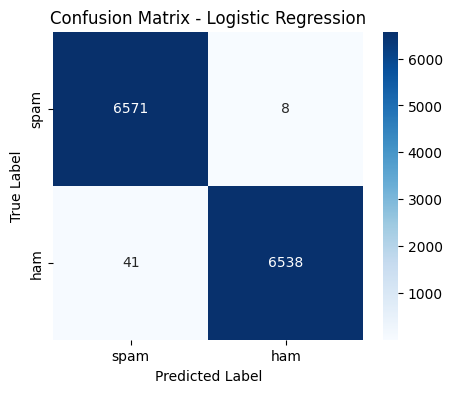

In [136]:

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_lr,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['spam', 'ham'],
    yticklabels=['spam', 'ham']
)

plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Naive Bayes Confusion Matrix

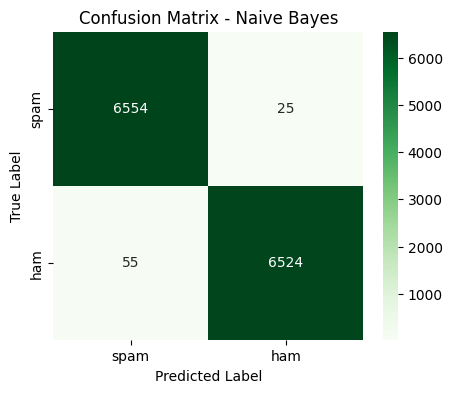

In [137]:

plt.figure(figsize=(5,4))
sns.heatmap(
    cm_nb,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=['spam', 'ham'],
    yticklabels=['spam', 'ham']
)

plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## 4.2 ROC Curve and AUC Score

In [138]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_prob_lr = log_reg.predict_proba(X_test)[:,1]
y_prob_nb = naive_bayes.predict_proba(X_test)[:,1]

# Computing ROC values
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)

auc_lr = auc(fpr_lr, tpr_lr)
auc_nb = auc(fpr_nb, tpr_nb)


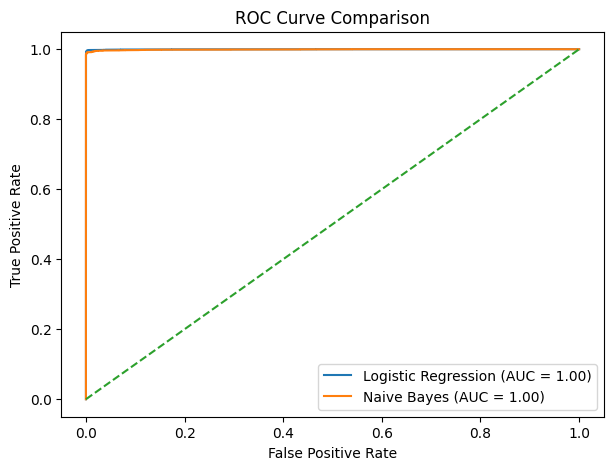

In [139]:
# Plotting ROC curves
plt.figure(figsize=(7,5))

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {auc_nb:.2f})')
plt.plot([0,1], [0,1], linestyle='--')

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [140]:
# Creating evaluation summary table
evaluation_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_nb)
    ],
    'Precision': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_nb)
    ],
    'Recall': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_nb)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_nb)
    ],
    'AUC': [auc_lr, auc_nb]
})

evaluation_summary

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.996276,0.998778,0.993768,0.996267,0.999586
1,Naive Bayes,0.993920,0.996183,0.991640,0.993906,0.999163


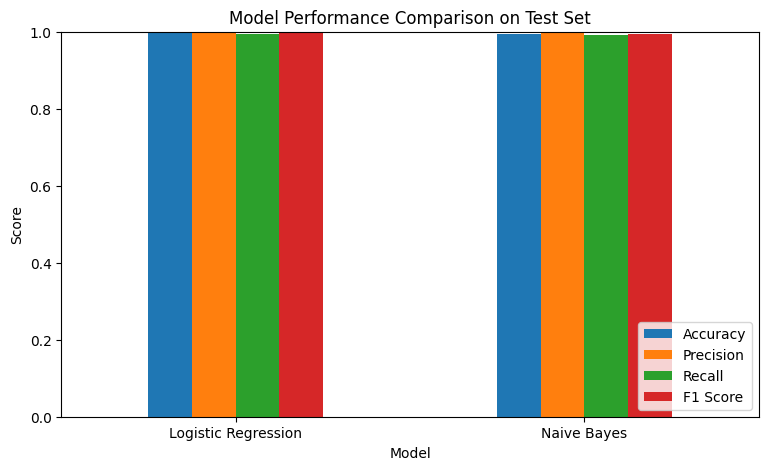

In [141]:
metrics_df = evaluation_summary.set_index('Model')

metrics_df[['Accuracy', 'Precision', 'Recall', 'F1 Score']].plot(
    kind='bar',
    figsize=(9,5)
)

plt.title("Model Performance Comparison on Test Set")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

# Section 5: Hyperparameter Tuning and Performance Enhancement

## 5.1 Hyperparameter Tuning: Logistic Regression

In [142]:
from sklearn.model_selection import GridSearchCV

# Parameter grid for Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}

# Grid Search
lr_grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid=lr_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Fit grid search
lr_grid.fit(X_train, y_train)

# Best parameters
lr_grid.best_params_

{'C': 10, 'solver': 'liblinear'}

In [143]:
best_lr = lr_grid.best_estimator_

## 5.2 Hyperparameter Tuning: Naive Bayes

In [144]:
nb_param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0]
}

# Grid Search
nb_grid = GridSearchCV(
    estimator=MultinomialNB(),
    param_grid=nb_param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Fit grid search
nb_grid.fit(X_train, y_train)

# Best parameters
nb_grid.best_params_

{'alpha': 0.01}

In [145]:
best_nb = nb_grid.best_estimator_

## 5.3 Evaluate Tuned Models on Test Set

In [146]:
y_pred_lr_tuned = best_lr.predict(X_test)
y_pred_nb_tuned = best_nb.predict(X_test)

## 5.4 Performance Comparison: Before vs After Tuning

In [147]:
# Probabilities for tuned models (required for AUC After)

# Tuned Logistic Regression probabilities
y_prob_lr_tuned = lr_grid.best_estimator_.predict_proba(X_test)[:, 1]

# Tuned Naive Bayes probabilities
y_prob_nb_tuned = nb_grid.best_estimator_.predict_proba(X_test)[:, 1]


In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Creating comparison table
tuning_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes'],
    
    'Accuracy (Before)': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_nb)
    ],
    'Accuracy (After)': [
        accuracy_score(y_test, y_pred_lr_tuned),
        accuracy_score(y_test, y_pred_nb_tuned)
    ],
    
    'Precision (Before)': [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_nb)
    ],
    'Precision (After)': [
        precision_score(y_test, y_pred_lr_tuned),
        precision_score(y_test, y_pred_nb_tuned)
    ],
    
    'Recall (Before)': [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_nb)
    ],
    'Recall (After)': [
        recall_score(y_test, y_pred_lr_tuned),
        recall_score(y_test, y_pred_nb_tuned)
    ],
    
    'F1 Score (Before)': [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_nb)
    ],
    'F1 Score (After)': [
        f1_score(y_test, y_pred_lr_tuned),
        f1_score(y_test, y_pred_nb_tuned)
    ],
    
    'AUC (Before)': [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_nb)
    ],
    'AUC (After)': [
        roc_auc_score(y_test, y_prob_lr_tuned),
        roc_auc_score(y_test, y_prob_nb_tuned)
    ]
})

tuning_comparison


,Model,Accuracy (Before),Accuracy (After),Precision (Before),Precision (After),Recall (Before),Recall (After),F1 Score (Before),F1 Score (After),AUC (Before),AUC (After)
0,Logistic Regression,0.996276,0.998176,0.998778,0.999391,0.993768,0.996960,0.996267,0.998174,0.999586,0.999732
1,Naive Bayes,0.993920,0.994072,0.996183,0.996184,0.991640,0.991944,0.993906,0.994059,0.999163,0.999322


## 5.5 Visualization: Impact of Hyperparameter Tuning

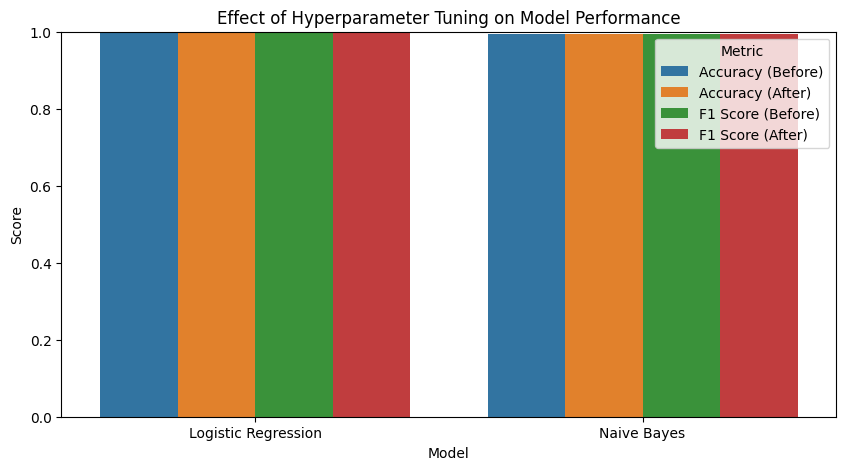

In [149]:
plot_df = tuning_comparison.melt(
    id_vars='Model',
    value_vars=['Accuracy (Before)', 'Accuracy (After)', 
                'F1 Score (Before)', 'F1 Score (After)'],
    var_name='Metric',
    value_name='Score'
)

# Plotting
plt.figure(figsize=(10,5))
sns.barplot(
    x='Model',
    y='Score',
    hue='Metric',
    data=plot_df
)

plt.title("Effect of Hyperparameter Tuning on Model Performance")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=0)
plt.show()

## 5.6 Hyperparameter Value vs Performance (Line Plot)

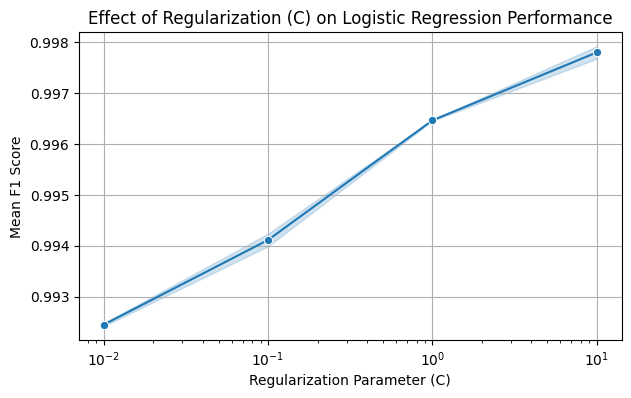

In [150]:
lr_results = pd.DataFrame(lr_grid.cv_results_)

# Plotting C vs mean F1 score
plt.figure(figsize=(7,4))
sns.lineplot(
    x=lr_results['param_C'].astype(float),
    y=lr_results['mean_test_score'],
    marker='o'
)

plt.xscale('log')
plt.xlabel("Regularization Parameter (C)")
plt.ylabel("Mean F1 Score")
plt.title("Effect of Regularization (C) on Logistic Regression Performance")
plt.grid(True)
plt.show()

## 5.7 Naive Bayes Smoothing Effect (Line Plot)

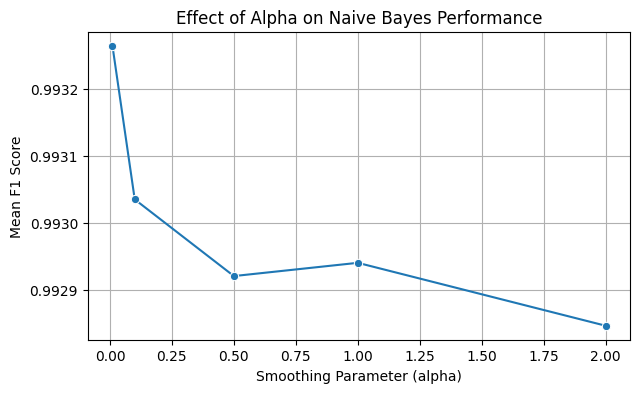

In [151]:
# Extracting NB GridSearch results
nb_results = pd.DataFrame(nb_grid.cv_results_)

plt.figure(figsize=(7,4))
sns.lineplot(
    x=nb_results['param_alpha'].astype(float),
    y=nb_results['mean_test_score'],
    marker='o'
)

plt.xlabel("Smoothing Parameter (alpha)")
plt.ylabel("Mean F1 Score")
plt.title("Effect of Alpha on Naive Bayes Performance")
plt.grid(True)
plt.show()

## 5.8 ROC Curve: Tuned vs Untuned Logistic Regression

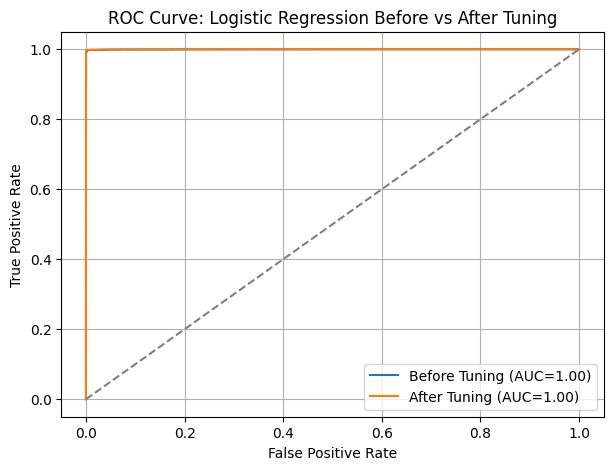

In [152]:
# Predicting probabilities
y_prob_lr_tuned = best_lr.predict_proba(X_test)[:,1]

fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_lr_tuned)
auc_tuned = auc(fpr_tuned, tpr_tuned)

plt.figure(figsize=(7,5))
plt.plot(fpr_lr, tpr_lr, label=f'Before Tuning (AUC={auc_lr:.2f})')
plt.plot(fpr_tuned, tpr_tuned, label=f'After Tuning (AUC={auc_tuned:.2f})')
plt.plot([0,1], [0,1], linestyle='--', color='gray')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Logistic Regression Before vs After Tuning")
plt.legend()
plt.grid(True)
plt.show()

## 5.9 ROC Curve: Tuned vs Untuned Naive Bayes

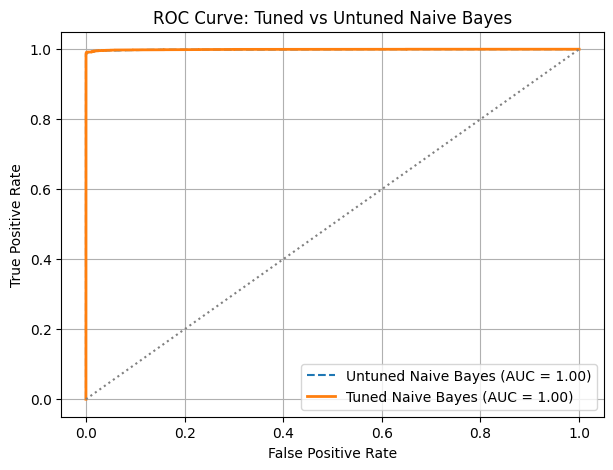

In [153]:
from sklearn.metrics import roc_curve, auc

# Untuned Naive Bayes probabilities
y_prob_nb_untuned = naive_bayes.predict_proba(X_test)[:, 1]

# Tuned Naive Bayes probabilities
y_prob_nb_tuned = best_nb.predict_proba(X_test)[:, 1]

# ROC values
fpr_nb_untuned, tpr_nb_untuned, _ = roc_curve(y_test, y_prob_nb_untuned)
fpr_nb_tuned, tpr_nb_tuned, _ = roc_curve(y_test, y_prob_nb_tuned)

# AUC scores
auc_nb_untuned = auc(fpr_nb_untuned, tpr_nb_untuned)
auc_nb_tuned = auc(fpr_nb_tuned, tpr_nb_tuned)

# Plotting ROC curves
plt.figure(figsize=(7,5))

plt.plot(
    fpr_nb_untuned, tpr_nb_untuned,
    linestyle='--',
    label=f'Untuned Naive Bayes (AUC = {auc_nb_untuned:.2f})'
)

plt.plot(
    fpr_nb_tuned, tpr_nb_tuned,
    linewidth=2,
    label=f'Tuned Naive Bayes (AUC = {auc_nb_tuned:.2f})'
)

plt.plot([0,1], [0,1], linestyle=':', color='gray')

plt.title("ROC Curve: Tuned vs Untuned Naive Bayes")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

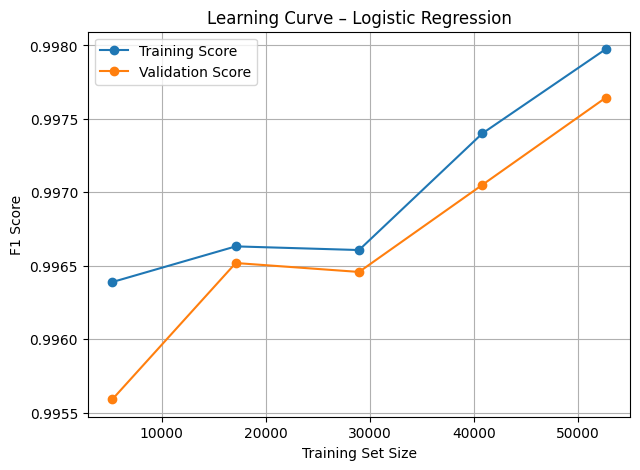

In [154]:
X = df['message']
y = df['label']

from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np

# Pipeline 
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ('lr', LogisticRegression(max_iter=1000))
])

train_sizes, train_scores, val_scores = learning_curve(
    pipeline,
    X,
    y,
    cv=5,
    scoring='f1_weighted',
    train_sizes=np.linspace(0.1, 1.0, 5),
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.figure(figsize=(7,5))
plt.plot(train_sizes, train_mean, marker='o', label='Training Score')
plt.plot(train_sizes, val_mean, marker='o', label='Validation Score')
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.title("Learning Curve – Logistic Regression")
plt.legend()
plt.grid(True)
plt.show()


## Ensemble using voting classifier 

In [155]:
## importing ensemble tools

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report


In [156]:
## defining base models 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

lr = LogisticRegression(max_iter=1000)
nb = MultinomialNB()


In [157]:
## creating soft voting ensemble 

ensemble_model = VotingClassifier(
    estimators=[
        ('lr', lr),
        ('nb', nb)
    ],
    voting='soft'   # uses probabilities
)


In [158]:
## training ensemble 
ensemble_model.fit(X_train, y_train)


,estimators,"[('lr', ...), ('nb', ...)]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [159]:
## evaluating ensemble 

y_pred_ens = ensemble_model.predict(X_test)

print("Ensemble Classification Report:")
print(classification_report(y_test, y_pred_ens))


Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6579
           1       1.00      0.99      1.00      6579

    accuracy                           1.00     13158
   macro avg       1.00      1.00      1.00     13158
weighted avg       1.00      1.00      1.00     13158



In [160]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_cm(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=['ham','spam'],
                yticklabels=['ham','spam'])
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


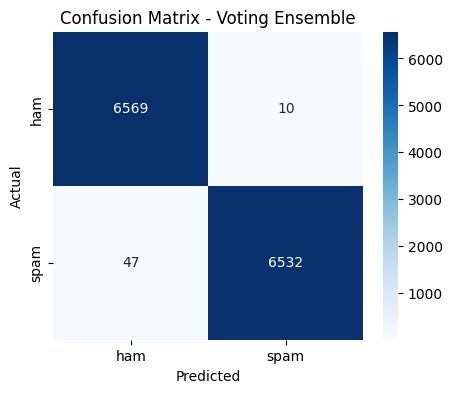

In [161]:
## confusion matrix for ensemble 

plot_cm(y_test, y_pred_ens, "Confusion Matrix - Voting Ensemble")


In [162]:

print(set(y_test))



{np.int64(0), np.int64(1)}


In [163]:
from sklearn.metrics import roc_curve, auc

y_prob_ens = ensemble_model.predict_proba(X_test)[:, 1]

fpr_ens, tpr_ens, _ = roc_curve(y_test, y_prob_ens, pos_label=1)
auc_ens = auc(fpr_ens, tpr_ens)

print("Ensemble AUC:", auc_ens)


Ensemble AUC: 0.9996298105310552


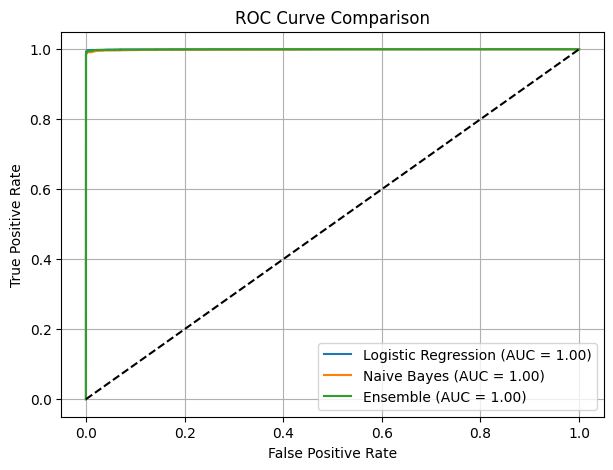

In [164]:
## comparing roc curves 

plt.figure(figsize=(7,5))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.2f})")
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb:.2f})")
plt.plot(fpr_ens, tpr_ens, label=f"Ensemble (AUC = {auc_ens:.2f})")
plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


## Sample Prediction

In [165]:

def show_sample_predictions_from_df(model, tfidf, df, n=5):
    sample_texts = df['message'].iloc[:n]          # raw SMS text
    sample_vectors = tfidf.transform(sample_texts) # TF-IDF using fitted vectorizer
    preds = model.predict(sample_vectors)

    for i in range(n):
        print("Message:", sample_texts.iloc[i])
        print("Predicted Label:", preds[i])
        print("-" * 60)

# Run sample predictions using tuned Logistic Regression
show_sample_predictions_from_df(lr_grid.best_estimator_, tfidf, df, n=5)


Message: How much would it cost to hire a gunman
Predicted Label: 0
------------------------------------------------------------
Message: You have been chosen to receive a £2000 shopping spree! Call 8760134479. Code 1B3VFX
Predicted Label: 1
------------------------------------------------------------
Message: You've been selected! iPhone 15 Pro Max is yours. Call 9208967033 now. Ref VT30N2
Predicted Label: 1
------------------------------------------------------------
Message: Hey! There's vegetable pizza... :/
Predicted Label: 0
------------------------------------------------------------
Message: Also maaaan are you missing out
Predicted Label: 0
------------------------------------------------------------


## Feature Visualization 

In [166]:
import numpy as np
import matplotlib.pyplot as plt

def _get_vectorizer_and_estimator(model, tfidf=None):
    """
    Works for:
    - Pipeline(model has .named_steps)
    - Plain sklearn estimator + separate tfidf
    """
    if hasattr(model, "named_steps"):  # Pipeline
        vec = model.named_steps.get("tfidf", None)
        est = None
        # estimator step might be named 'lr' or 'nb' (common)
        for k in ["lr", "nb", "model", "clf"]:
            if k in model.named_steps:
                est = model.named_steps[k]
                break
        if est is None:
            # fallback: last step
            est = list(model.named_steps.values())[-1]
        return vec, est
    else:
        return tfidf, model

def plot_top_words(scores, feature_names, title, top_n=20):
    idx = np.argsort(scores)[-top_n:]
    top_features = np.array(feature_names)[idx]
    top_scores = scores[idx]

    plt.figure(figsize=(10,6))
    plt.barh(top_features, top_scores)
    plt.title(title)
    plt.xlabel("Importance (higher = more indicative)")
    plt.tight_layout()
    plt.show()
 

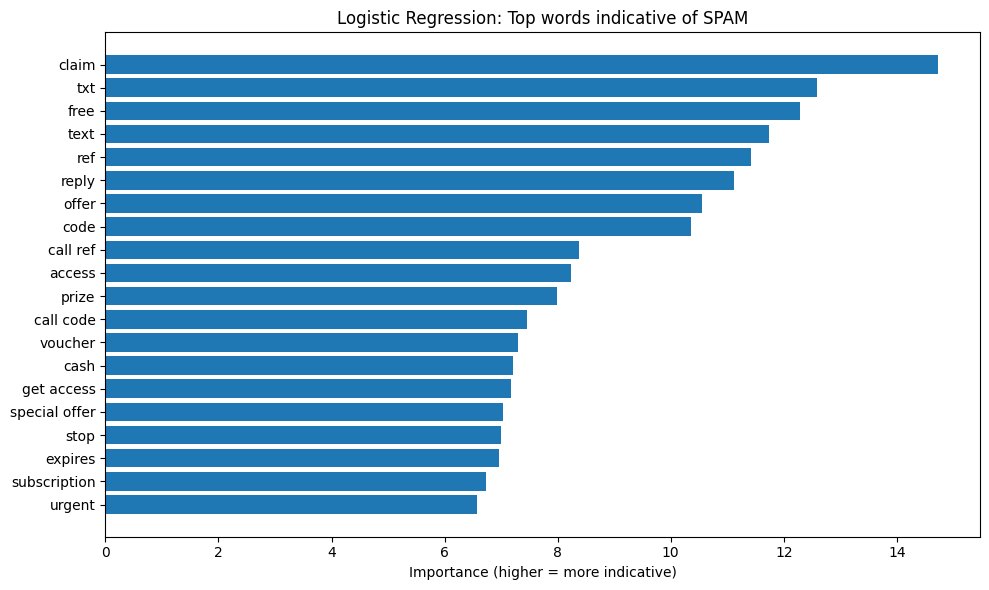

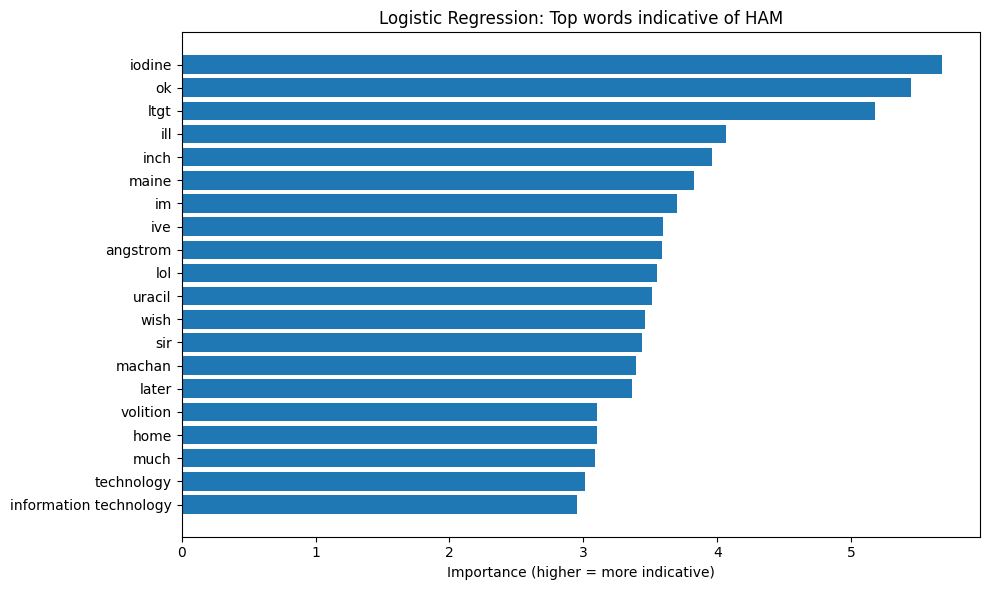

In [167]:
# Logistic Regression Feature Visualization

lr_model = lr_grid.best_estimator_  

vec, lr = _get_vectorizer_and_estimator(lr_model, tfidf=tfidf)

feature_names = vec.get_feature_names_out()

# For binary logistic regression: coef_ corresponds to classes_[1]
coefs = lr.coef_.ravel()

# Determining which class is "spam" inside the model
# If classes are strings: ['ham','spam']
# If classes are numeric: [0,1] assuming 1=spam
if hasattr(lr, "classes_"):
    classes = list(lr.classes_)
else:
    classes = [0, 1]

# If spam is the positive class, positive coefs indicate spam
# If model's positive class is not spam, flip signs
positive_class = classes[1] if len(classes) > 1 else classes[0]
is_spam_positive = (positive_class == "spam") or (positive_class == 1)

spam_scores = coefs if is_spam_positive else -coefs
ham_scores  = -spam_scores

plot_top_words(spam_scores, feature_names, "Logistic Regression: Top words indicative of SPAM", top_n=20)
plot_top_words(ham_scores,  feature_names, "Logistic Regression: Top words indicative of HAM",  top_n=20)


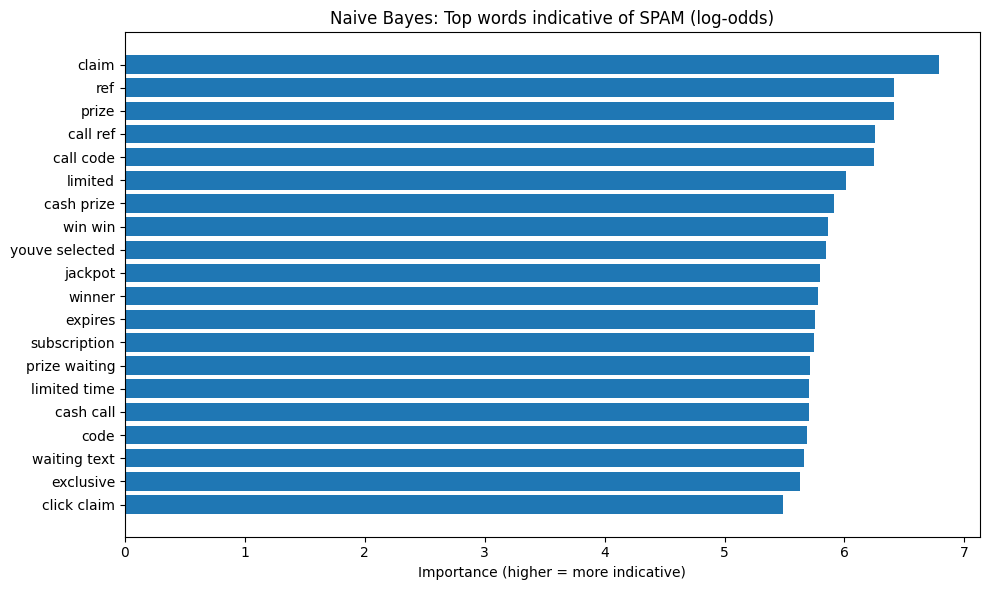

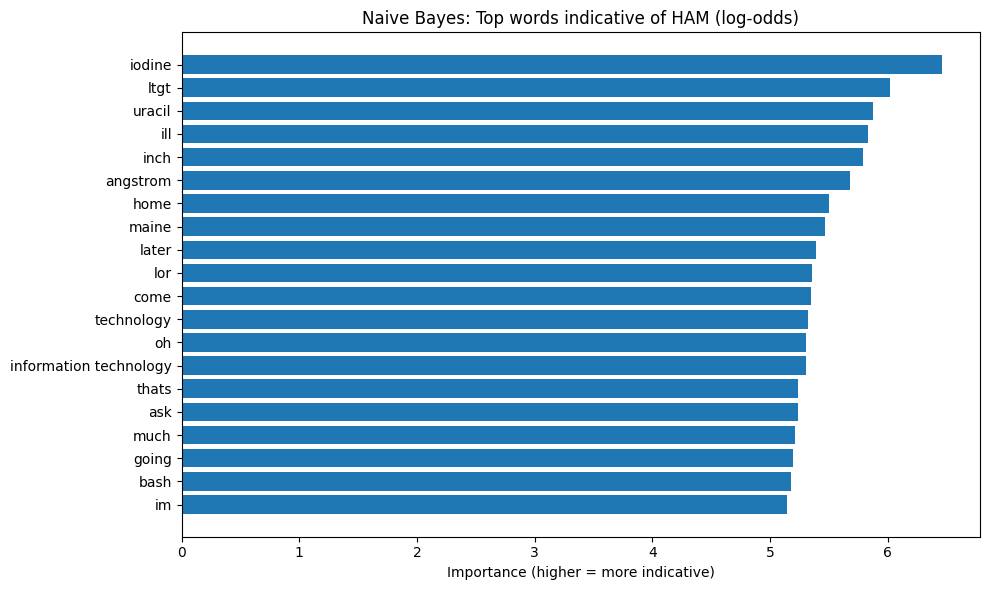

In [168]:
## Naive Bayes Feature Visualization

nb_model = naive_bayes  

vec, nb = _get_vectorizer_and_estimator(nb_model, tfidf=tfidf)

feature_names = vec.get_feature_names_out()

# MultinomialNB: feature_log_prob_[class, feature]
# computing "spam vs ham" log-odds per word:
# log P(word|spam) - log P(word|ham)
classes = list(nb.classes_)

# find indices for spam and ham
if "spam" in classes and "ham" in classes:
    spam_i = classes.index("spam")
    ham_i  = classes.index("ham")
else:
    # assuming 1=spam, 0=ham
    spam_i = classes.index(1) if 1 in classes else 1
    ham_i  = classes.index(0) if 0 in classes else 0

log_odds = nb.feature_log_prob_[spam_i] - nb.feature_log_prob_[ham_i]

plot_top_words(log_odds, feature_names, "Naive Bayes: Top words indicative of SPAM (log-odds)", top_n=20)
plot_top_words(-log_odds, feature_names, "Naive Bayes: Top words indicative of HAM (log-odds)", top_n=20)


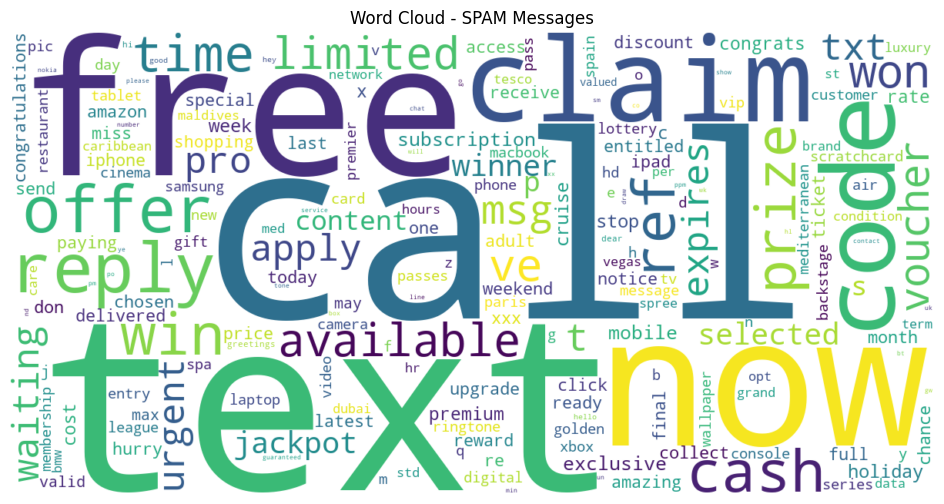

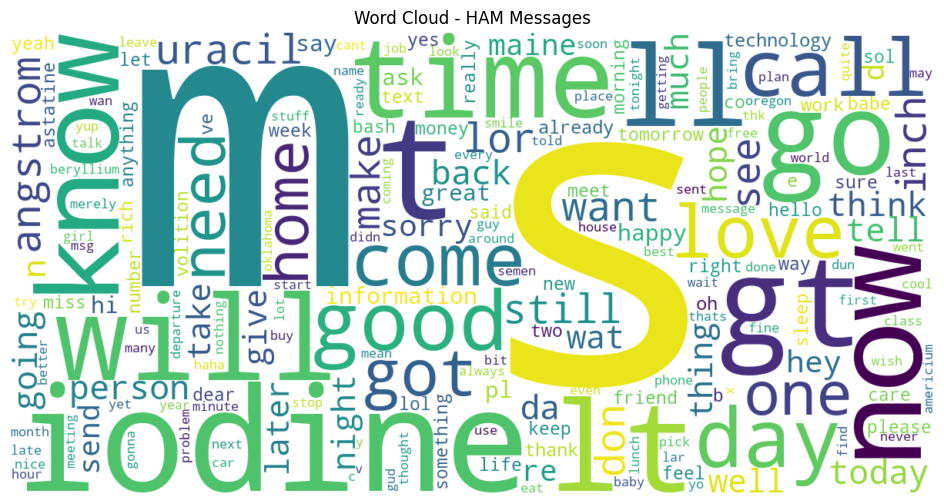

In [169]:
!pip install wordcloud

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import re
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", " ", text)     # remove URLs
    text = re.sub(r"[^a-z\s]", " ", text)          # keep only letters
    text = re.sub(r"\s+", " ", text).strip()       # extra spaces
    return text
# If needed, rename your columns to match:
# df = df.rename(columns={"v1":"label", "v2":"message"})

df["message_clean"] = df["message"].apply(clean_text)

spam_text = " ".join(df[df["label"] == "spam"]["message_clean"].tolist())
ham_text  = " ".join(df[df["label"] == "ham"]["message_clean"].tolist())

custom_stopwords = set(STOPWORDS)
# Optional: add common words you don’t want
custom_stopwords.update(["u", "ur", "im", "dont", "dont", "ok", "ya", "amp"])

def plot_wordcloud(text, title):
    wc = WordCloud(
        width=1200,
        height=600,
        background_color="white",
        stopwords=custom_stopwords,
        collocations=False
    ).generate(text)

    plt.figure(figsize=(12,6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

plot_wordcloud(spam_text, "Word Cloud - SPAM Messages")
plot_wordcloud(ham_text, "Word Cloud - HAM Messages")
